In [ ]:
# Train Test Split
# Printing Model Object
# Create the Solution First then label areas you'll fill in 

# Data Science Process

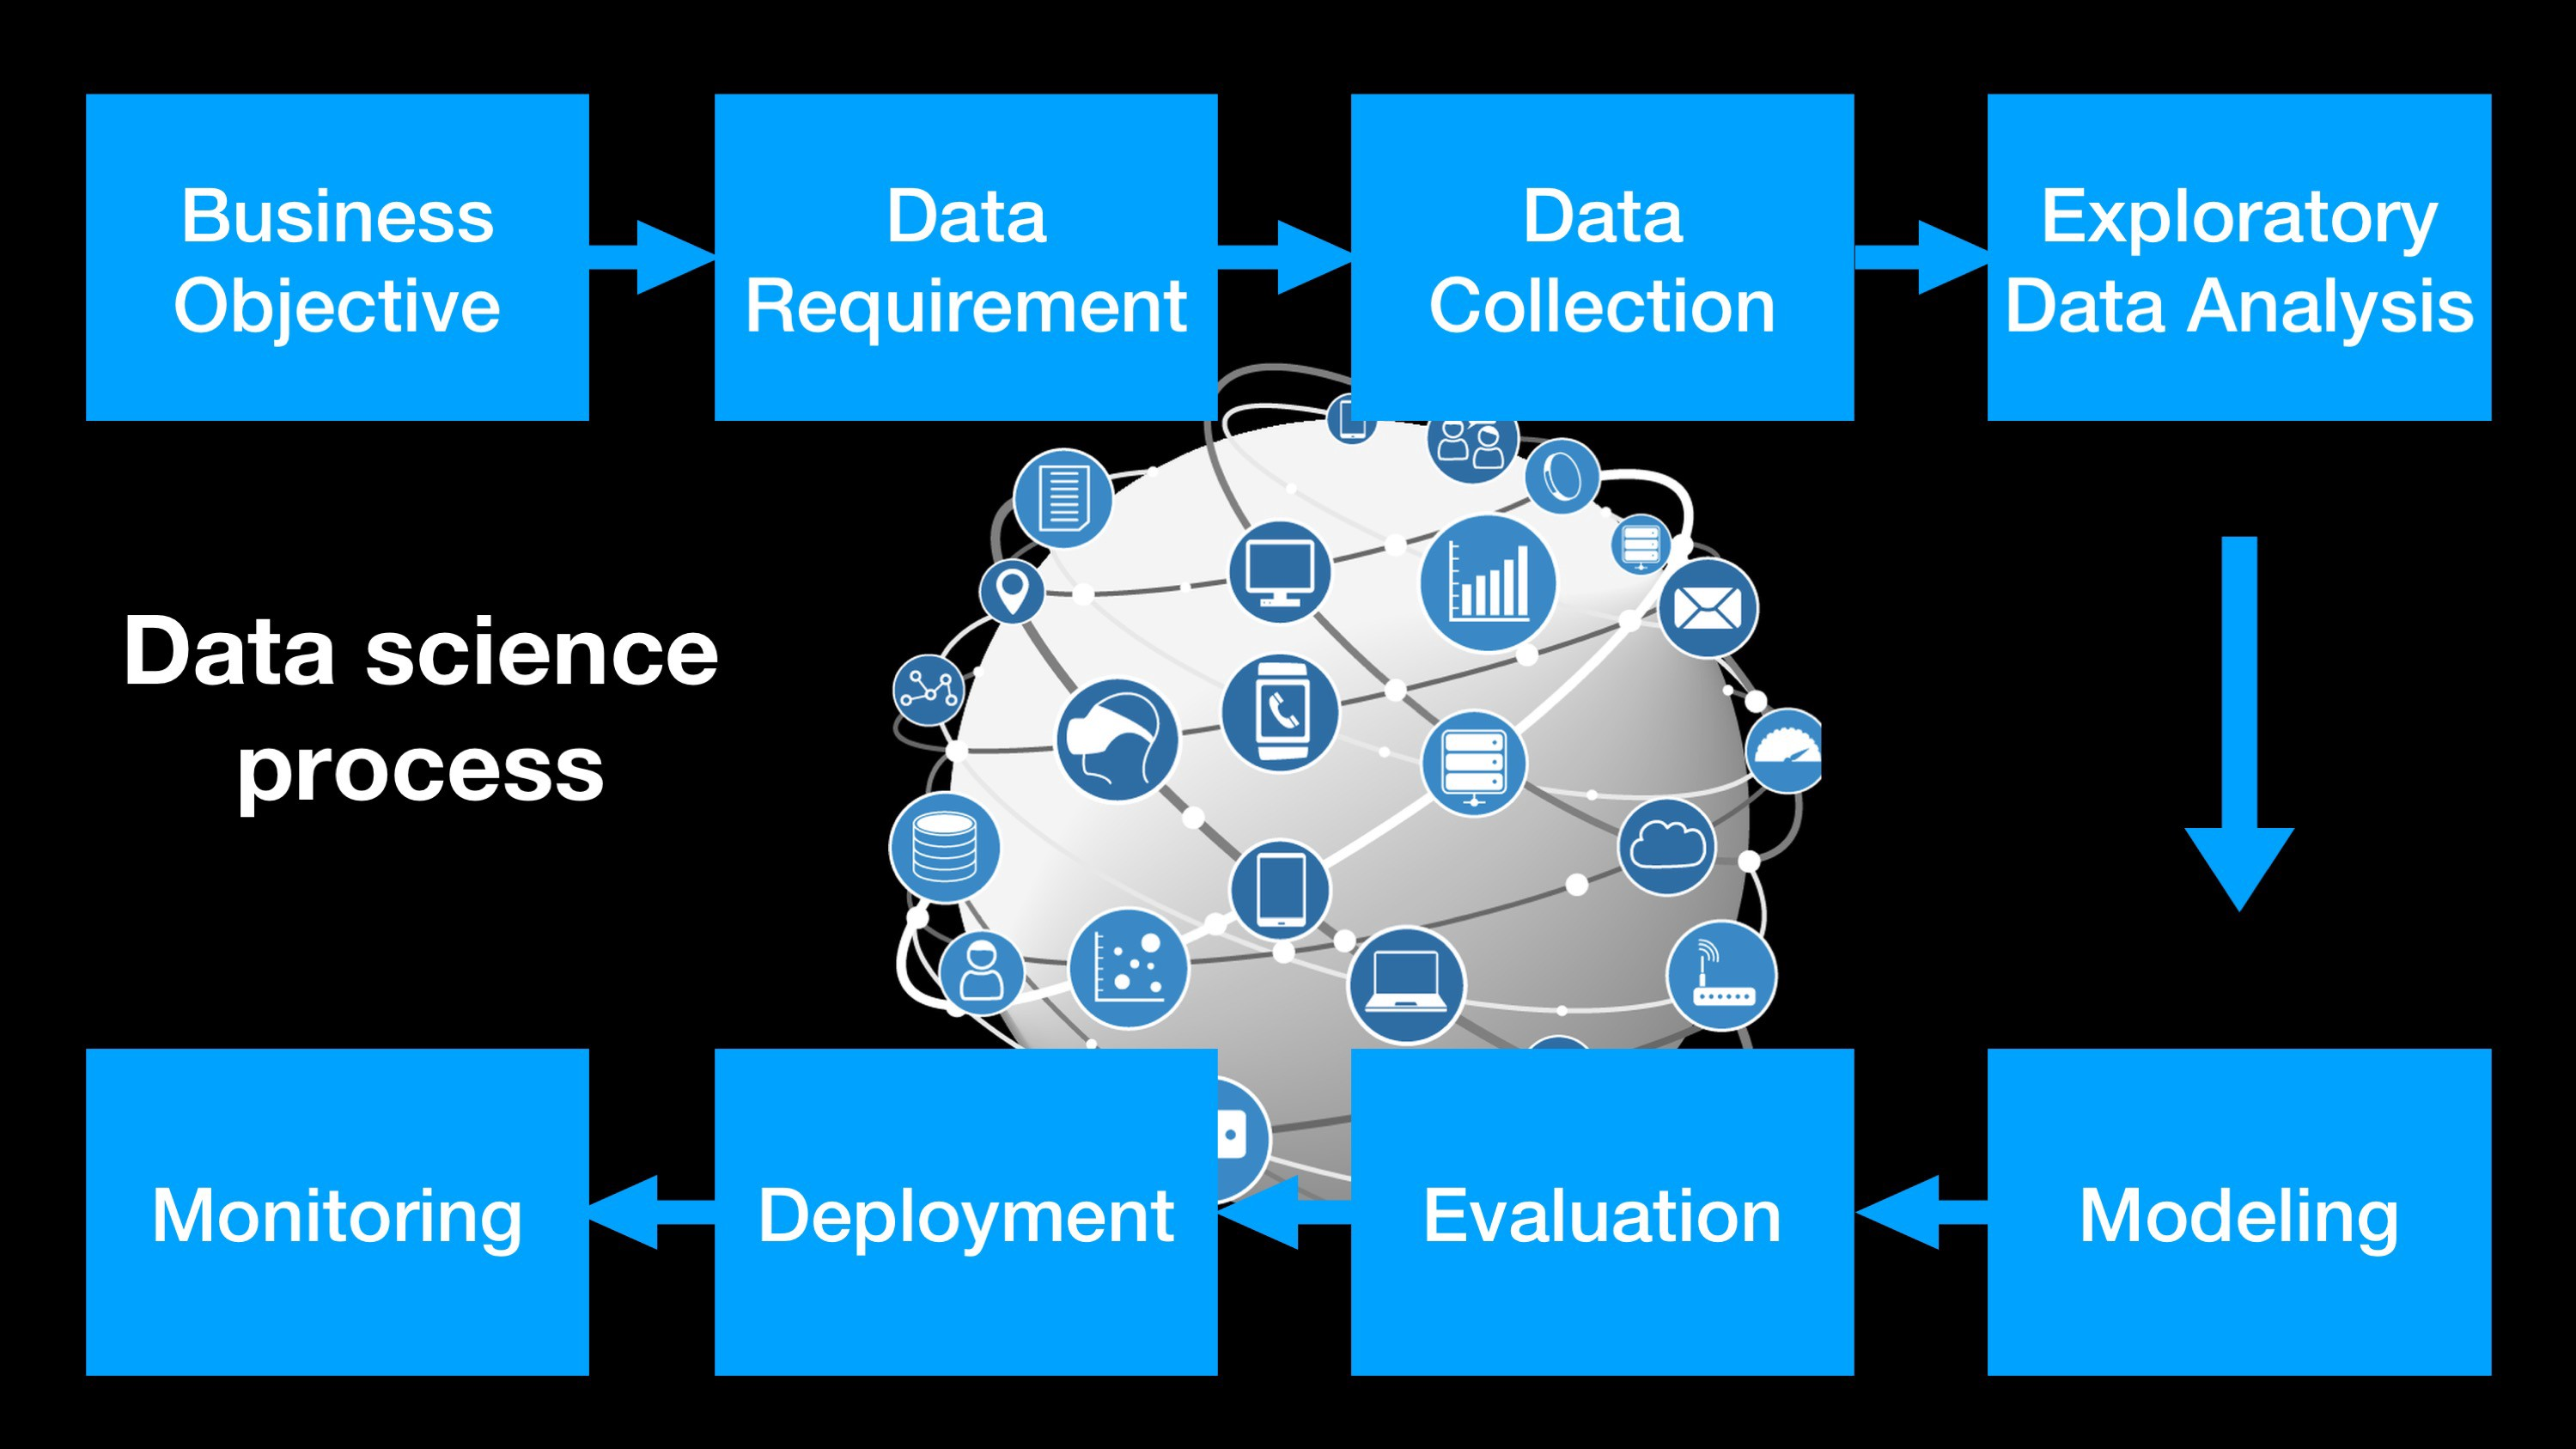

In [1]:
# Variables Explained 
from IPython.display import Image
Image(filename='Data-Science-Process.jpg') 

## Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

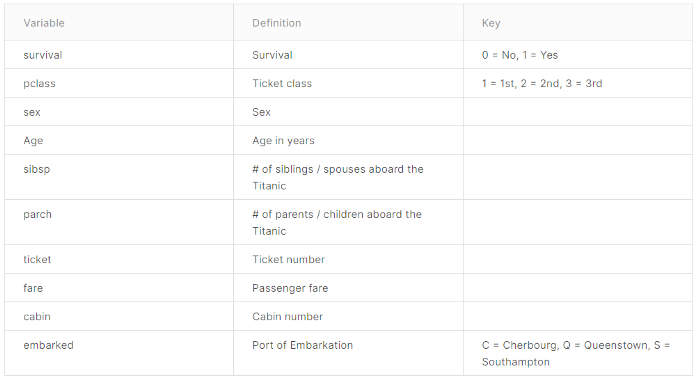

In [3]:
# Variables Explained 
# from IPython.display import Image
Image(filename='Variables-Explained.png') 

In [4]:
df = pd.read_csv('titanic_dataset.csv')

# Reordering
df = df[[ 'Name', 'Sex', 'Age', 'PassengerId', 'Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]
df.head(5)

,Name,Sex,Age,PassengerId,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,"Braund, Mr. Owen Harris",male,22.0,1,3,1,0,A/5 21171,7.2500,NaN,S,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,2,1,1,0,PC 17599,71.2833,C85,C,1
2,"Heikkinen, Miss. Laina",female,26.0,3,3,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,4,1,1,0,113803,53.1000,C123,S,1
4,"Allen, Mr. William Henry",male,35.0,5,3,0,0,373450,8.0500,NaN,S,0


## Discussion Point - What are Variables You Think Are Important?

<AxesSubplot:xlabel='Survived', ylabel='count'>

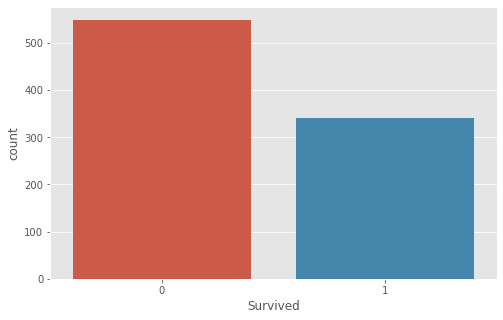

In [5]:
plt.figure(figsize = (8,5))
sns.countplot(x='Survived', data=df)

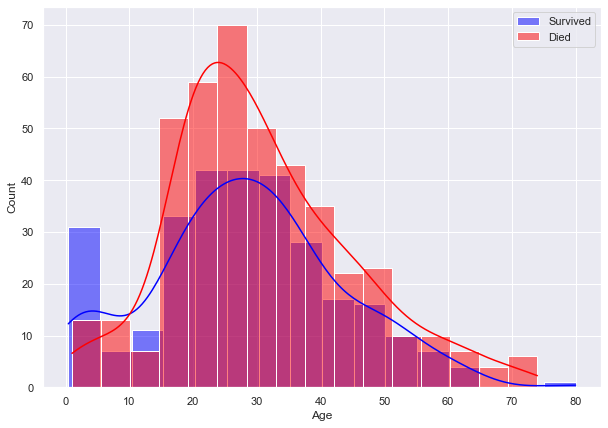

In [6]:
sns.set(style="darkgrid")

lived = df[df['Survived'] == 1]
died = df[df['Survived'] == 0]

plt.figure(figsize = (10,7))

sns.histplot(data=lived, x="Age", color="blue", label="Survived", kde=True)
sns.histplot(data=died, x="Age", color="red", label="Died", kde=True)

plt.legend() 
plt.show()

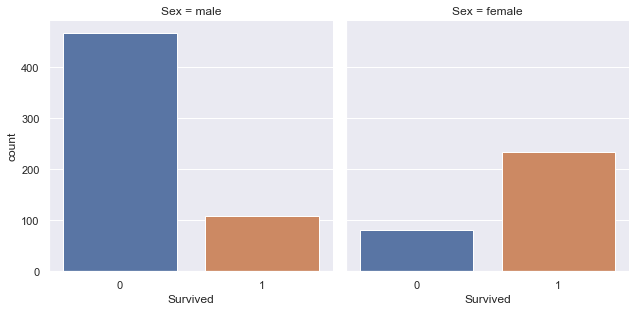

In [7]:
sns.catplot(x="Survived", col="Sex", col_wrap=2, data=df, kind="count", height=4.5, aspect=1)

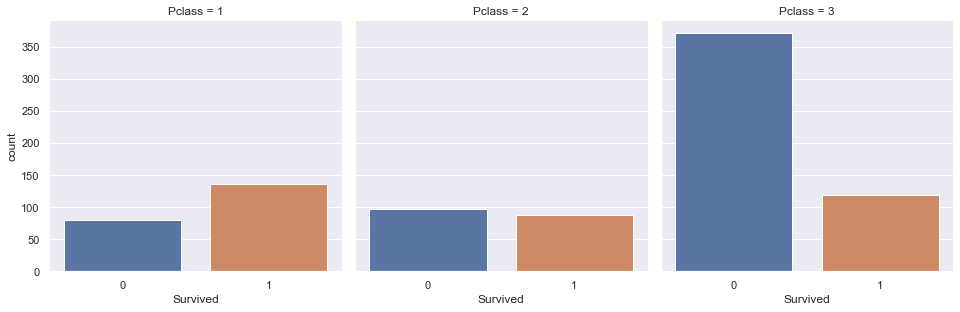

In [8]:
sns.catplot(x="Survived", col="Pclass", col_wrap=3, data=df, kind="count", height=4.5, aspect=1)

## What about Missing Data?

In [9]:
# Reordering
df = df[[ 'Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Survived']]
print("Number of rows: ", df.shape[0])
print(""""
Done for Space
""")
df.info()

Number of rows:  891
"
Done for Space

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       714 non-null    float64
 2   Pclass    891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  889 non-null    object 
 6   Survived  891 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [10]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df['Embarked'].fillna('S', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       891 non-null    float64
 2   Pclass    891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  891 non-null    object 
 6   Survived  891 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


## Looks like age and Embarkation 

## Computers can't read

In [13]:
df.head()

,Sex,Age,Pclass,SibSp,Parch,Embarked,Survived
0,male,22.0,3,1,0,S,0
1,female,38.0,1,1,0,C,1
2,female,26.0,3,0,0,S,1
3,female,35.0,1,1,0,S,1
4,male,35.0,3,0,0,S,0


In [14]:
print("The Sex variable is", df['Sex'].unique()[0], "|" ,df['Sex'].unique()[1])
print("The Embarking variable is", df['Embarked'].unique()[0], "," ,df['Embarked'].unique()[1], "and", df['Embarked'].unique()[2])

The Sex variable is male | female
The Embarking variable is S , C and Q


## Encoding of variables

In [15]:
cat_feats = ['Sex', 'Embarked']
df = pd.get_dummies(df,columns=cat_feats)

df = df[[ 'Sex_male', 'Sex_female', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived']]

## Final Data Set With the Extra Variables Dropped

In [16]:
df.head(3)

,Sex_male,Sex_female,Age,Pclass,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,0,22.0,3,1,0,0,0,1,0
1,0,1,38.0,1,1,0,1,0,0,1
2,0,1,26.0,3,0,0,0,0,1,1


## Training vs. Testing - How well your model will generalize

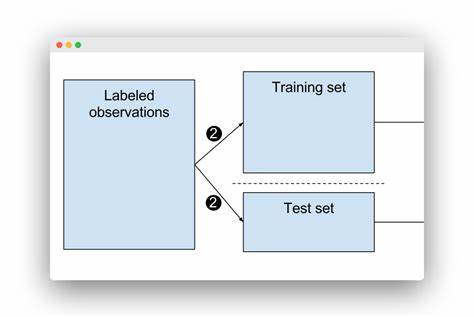

In [17]:
Image(filename='Train-Test-Split.jpg')

## Train Test Split

In [18]:
# Splitting into X and Y Variables
X = df.drop('Survived',axis=1) 
y =  df['Survived']

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

## Now the AI Starts - Decision Tree or Logit?

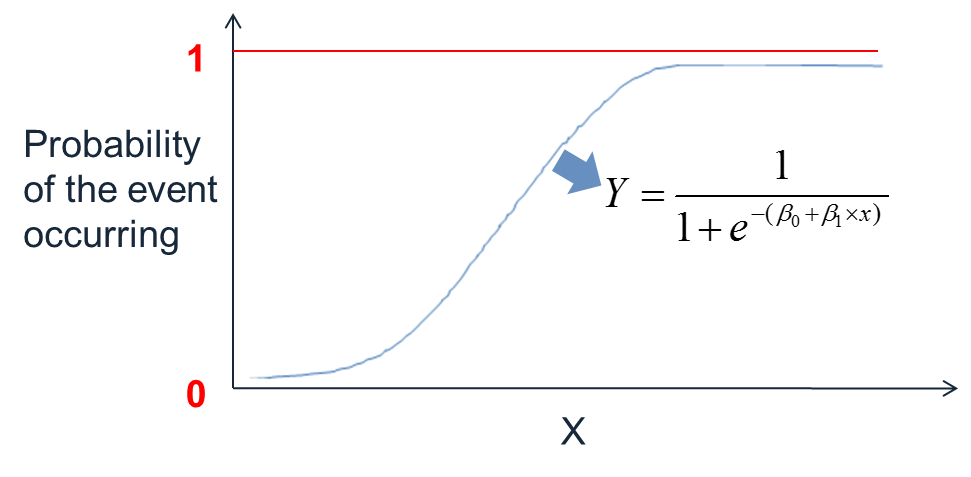

In [19]:
Image(filename='logit.png')

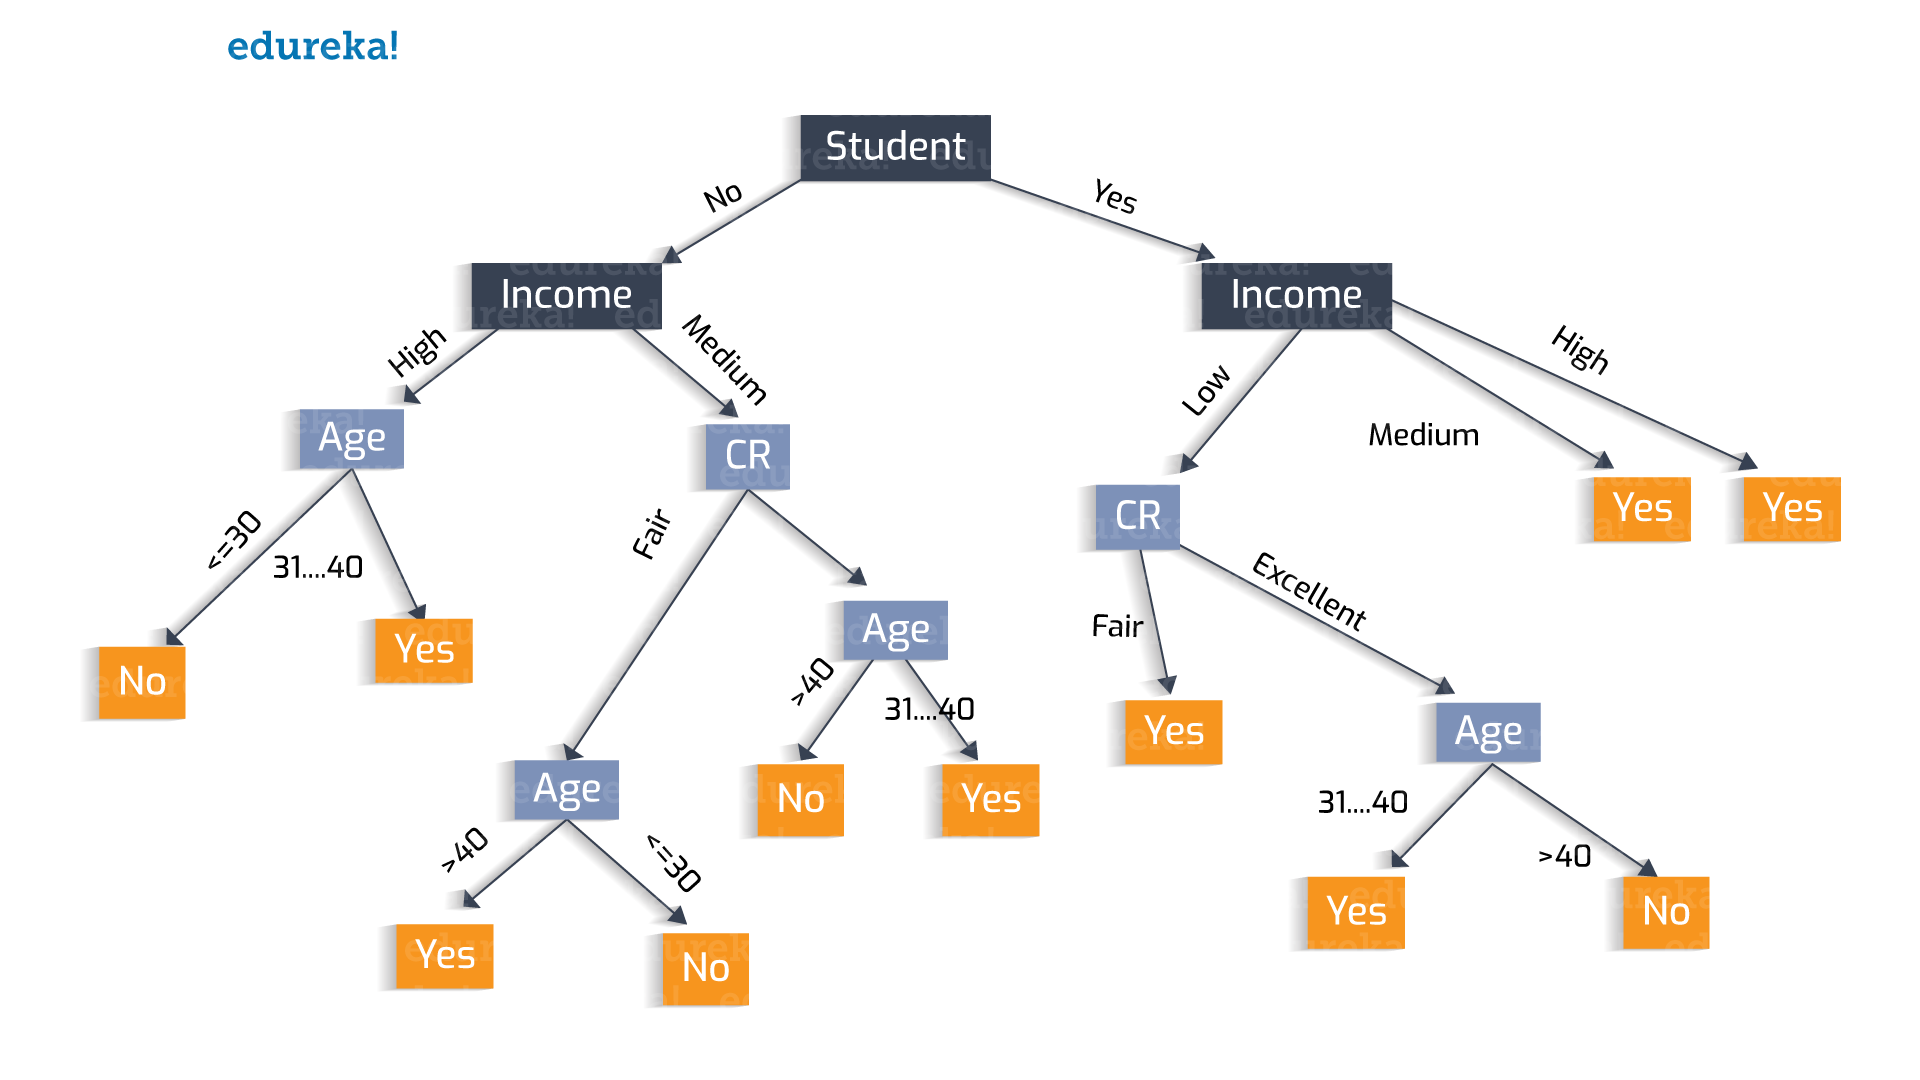

In [20]:
Image(filename='decision-tree.png')

## Using Logistic Regression

In [21]:
df.head(3)

,Sex_male,Sex_female,Age,Pclass,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,0,22.0,3,1,0,0,0,1,0
1,0,1,38.0,1,1,0,1,0,0,1
2,0,1,26.0,3,0,0,0,0,1,1


In [22]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression 
logReg = LogisticRegression()

logReg.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_test

331    0
700    1
748    0
751    1
481    0
      ..
306    1
830    1
130    0
48     0
641    1
Name: Survived, Length: 312, dtype: int64

In [24]:
# Predicting and Making a classification report
predictions = logReg.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

# Making the classification report
print('Classification Report:')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       180
           1       0.82      0.70      0.75       132

    accuracy                           0.81       312
   macro avg       0.81      0.79      0.80       312
weighted avg       0.81      0.81      0.80       312



Confusion Matrix:
[[160  20]
 [ 40  92]]


## Using Random Forest

In [25]:
# Importing Random Forest
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()


# Fitting and Predicting 
rand_forest.fit(X_train, y_train)
pred = rand_forest.predict(X_test)

# Printing the confusion matrix
print("Classification Report:")
print(classification_report(y_test,pred))
print('\n')
print("Confusion Matrix:")
print(confusion_matrix(y_test,pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       180
           1       0.79      0.70      0.74       132

    accuracy                           0.79       312
   macro avg       0.79      0.78      0.78       312
weighted avg       0.79      0.79      0.79       312



Confusion Matrix:
[[155  25]
 [ 40  92]]


In [26]:
import time

start_time = time.time()
importances = rand_forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rand_forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.006 seconds


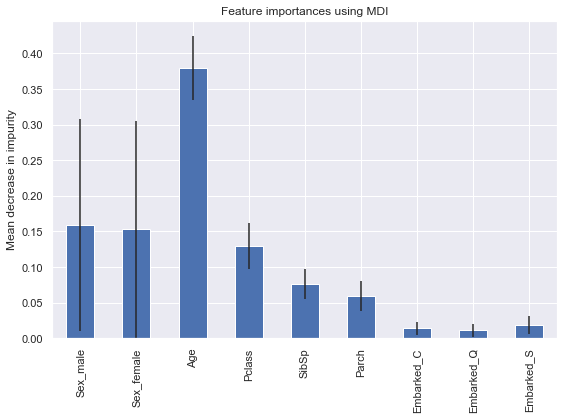

In [27]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots(figsize=(8,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [28]:
# Printing the Model Object
print(X_test.columns)

print("""" """)

print(logReg.coef_)

Index(['Sex_male', 'Sex_female', 'Age', 'Pclass', 'SibSp', 'Parch',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
" 
[[-1.26670895  1.27764124 -0.0377567  -1.13510043 -0.23236956 -0.06725126
   0.2181808   0.11688064 -0.32412916]]
